In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ratings_list = [i.strip().split("::") for i in open('data/ml-1m/ratings.dat', 'r').readlines()]
users_list = [i.strip().split("::") for i in open('data/ml-1m/users.dat', 'r').readlines()]
movies_list = [i.strip().split("::") for i in open('data/ml-1m/movies.dat', 'r').readlines()]

In [4]:
ratings_df = pd.DataFrame(ratings_list, columns = ['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype = int)
movies_df = pd.DataFrame(movies_list, columns = ['MovieID', 'Title', 'Genres'])
movies_df['MovieID'] = movies_df['MovieID'].apply(pd.to_numeric)

In [5]:
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [60]:
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [123]:
# Veamos por ejemplo cuáles peĺículas fueron puntuadas por el usuario con ID=1:

ratings_df[ratings_df.UserID==1]

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [124]:
# y ahora veamos qué películas le gustan al usuario 1

ids = ratings_df[ratings_df.UserID==1].MovieID
rat = ratings_df[ratings_df.UserID==1].Rating

# irdenar las peliculas por rating
ids_sorted = [x for _,x in sorted(zip(rat, ids))]

In [125]:
movies_df[movies_df['MovieID'].isin(ids_sorted)]

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
47,48,Pocahontas (1995),Animation|Children's|Musical|Romance
148,150,Apollo 13 (1995),Drama
257,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi
523,527,Schindler's List (1993),Drama|War
527,531,"Secret Garden, The (1993)",Children's|Drama
584,588,Aladdin (1992),Animation|Children's|Comedy|Musical
590,594,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical
591,595,Beauty and the Beast (1991),Animation|Children's|Musical
604,608,Fargo (1996),Crime|Drama|Thriller


In [81]:
# selecting pandas rows
#https://chrisalbon.com/python/data_wrangling/pandas_selecting_rows_on_conditions/

(array([ 56174., 107557., 261197., 348971., 226310.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 5 Patch objects>)

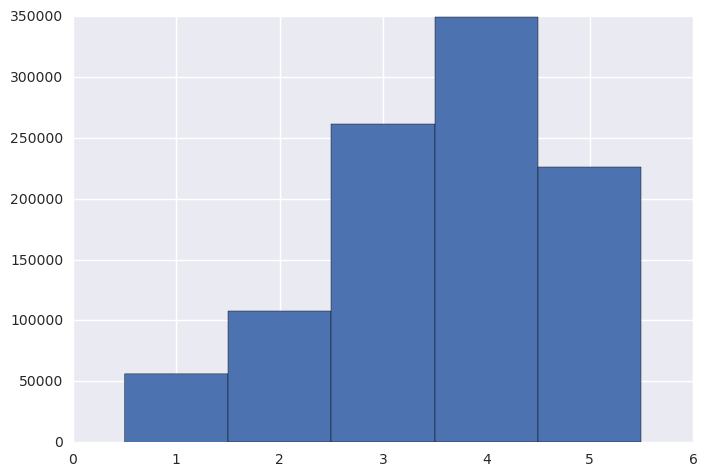

In [126]:
plt.hist(ratings_df['Rating'], bins=[0.5,1.5,2.5,3.5,4.5,5.5])

<img src="path6545-2-15.png" width="600">

<img src="text5019.png" width="800">

In [127]:
R_df = ratings_df.pivot(index = 'UserID', columns ='MovieID', values = 'Rating').fillna(0)
R_df.head()
#https://buildingrecommenders.wordpress.com/2015/11/18/overview-of-recommender-algorithms-part-2/

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(array([ 16.,  61., 345., 835., 820.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 5 Patch objects>)

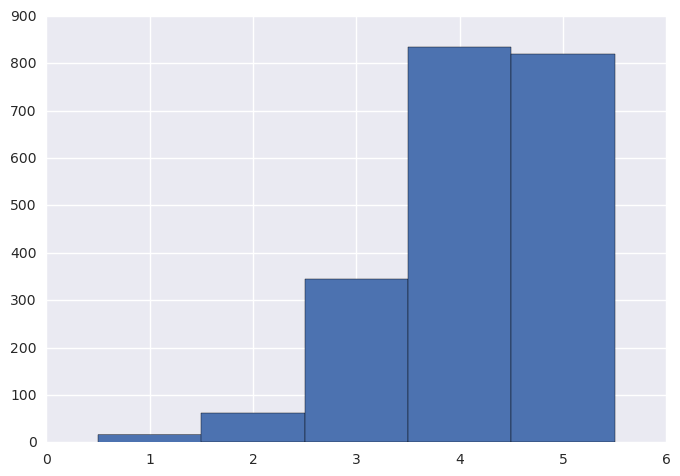

In [130]:
# Veamos como son las puntuaciones del usuario 1
x = list(filter(lambda x: x>0, R_df[1]))
plt.hist(x, bins=[0.5,1.5,2.5,3.5,4.5,5.5])

(array([16., 29., 33., 22.,  2.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 5 Patch objects>)

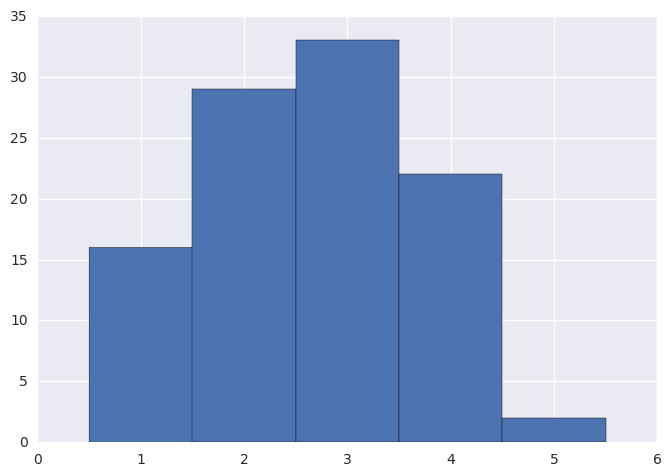

In [131]:
# Veamos como son las puntuaciones de otro usuario
x = list(filter(lambda x: x>0, R_df[9]))
plt.hist(x, bins=[0.5,1.5,2.5,3.5,4.5,5.5])

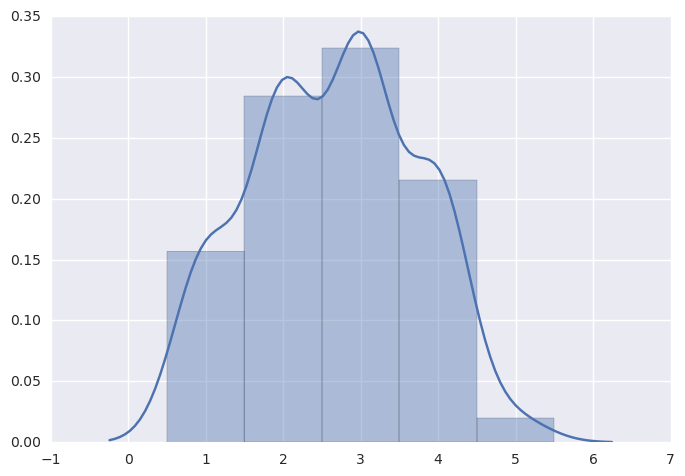

In [132]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(x,bins=[0.5,1.5,2.5,3.5,4.5,5.5])

In [44]:
R = R_df.as_matrix()
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

In [45]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned, k = 50)

In [46]:
sigma = np.diag(sigma)
print sigma

[[ 147.18581225    0.            0.         ...    0.
     0.            0.        ]
 [   0.          147.62154312    0.         ...    0.
     0.            0.        ]
 [   0.            0.          148.58855276 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ...  574.46932602
     0.            0.        ]
 [   0.            0.            0.         ...    0.
   670.41536276    0.        ]
 [   0.            0.            0.         ...    0.
     0.         1544.10679346]]


In [47]:
user_ratings_mean.reshape(-1,1)

array([[0.05990286],
       [0.12924987],
       [0.05369671],
       ...,
       [0.02050729],
       [0.1287102 ],
       [0.3291959 ]])

In [48]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [49]:
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = R_df.columns)
preds_df.head()

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
0,4.288861,0.143055,-0.195080,-0.018843,0.012232,-0.176604,-0.074120,0.141358,-0.059553,-0.195950,...,0.027807,0.001640,0.026395,-0.022024,-0.085415,0.403529,0.105579,0.031912,0.050450,0.088910
1,0.744716,0.169659,0.335418,0.000758,0.022475,1.353050,0.051426,0.071258,0.161601,1.567246,...,-0.056502,-0.013733,-0.010580,0.062576,-0.016248,0.155790,-0.418737,-0.101102,-0.054098,-0.140188
2,1.818824,0.456136,0.090978,-0.043037,-0.025694,-0.158617,-0.131778,0.098977,0.030551,0.735470,...,0.040481,-0.005301,0.012832,0.029349,0.020866,0.121532,0.076205,0.012345,0.015148,-0.109956
3,0.408057,-0.072960,0.039642,0.089363,0.041950,0.237753,-0.049426,0.009467,0.045469,-0.111370,...,0.008571,-0.005425,-0.008500,-0.003417,-0.083982,0.094512,0.057557,-0.026050,0.014841,-0.034224
4,1.574272,0.021239,-0.051300,0.246884,-0.032406,1.552281,-0.199630,-0.014920,-0.060498,0.450512,...,0.110151,0.046010,0.006934,-0.015940,-0.050080,-0.052539,0.507189,0.033830,0.125706,0.199244


In [196]:
R_df.head()

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [211]:
movie_ids = list(R_df.columns.values)


In [221]:
print preds_df.loc[1:10, 1:5]
print R_df.loc[1:10, 1:5]

MovieID         1         2         3         4         5
1        0.744716  0.169659  0.335418  0.000758  0.022475
2        1.818824  0.456136  0.090978 -0.043037 -0.025694
3        0.408057 -0.072960  0.039642  0.089363  0.041950
4        1.574272  0.021239 -0.051300  0.246884 -0.032406
5        2.080954  0.200896  0.257427  0.071778  0.188707
6        0.050561  0.145551  0.071439  0.030906 -0.063137
7        0.818760  0.157268  0.691568  0.335525 -0.082421
8        3.667258  0.125559  0.025810 -0.039819 -0.083895
9        4.516912  2.968196  1.254102  0.378729  1.123322
10       1.567348  0.192052  0.536115  0.115115  0.417369
MovieID    1    2    3    4    5
UserID                          
1        5.0  0.0  0.0  0.0  0.0
2        0.0  0.0  0.0  0.0  0.0
3        0.0  0.0  0.0  0.0  0.0
4        0.0  0.0  0.0  0.0  0.0
5        0.0  0.0  0.0  0.0  0.0
6        4.0  0.0  0.0  0.0  0.0
7        0.0  0.0  0.0  0.0  0.0
8        4.0  0.0  0.0  3.0  0.0
9        5.0  0.0  0.0  0.0  0.0

In [195]:
R_df.iloc[0][1]

5.0

In [134]:
for i in range(4):
    print(preds_df.values[i][0:3])

[ 4.28886061  0.14305516 -0.1950795 ]
[0.74471587 0.16965927 0.33541808]
[1.81882382 0.45613623 0.09097801]
[ 0.40805697 -0.07296018  0.03964241]


In [175]:
# veamos las diferencias entre la matriz original y la matrix de predicciones:

for i in np.arange(1,3952):
    x=R_df[i]

#R_df[3952]



KeyError: 51

In [52]:
preds_df.head(3)

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
0,4.288861,0.143055,-0.195080,-0.018843,0.012232,-0.176604,-0.074120,0.141358,-0.059553,-0.195950,...,0.027807,0.001640,0.026395,-0.022024,-0.085415,0.403529,0.105579,0.031912,0.050450,0.088910
1,0.744716,0.169659,0.335418,0.000758,0.022475,1.353050,0.051426,0.071258,0.161601,1.567246,...,-0.056502,-0.013733,-0.010580,0.062576,-0.016248,0.155790,-0.418737,-0.101102,-0.054098,-0.140188
2,1.818824,0.456136,0.090978,-0.043037,-0.025694,-0.158617,-0.131778,0.098977,0.030551,0.735470,...,0.040481,-0.005301,0.012832,0.029349,0.020866,0.121532,0.076205,0.012345,0.015148,-0.109956


In [53]:
def recommend_movies(predictions_df, userID, movies_df, original_ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # UserID starts at 1, not 0
    sorted_user_predictions = preds_df.iloc[user_row_number].sort_values(ascending=False) # UserID starts at 1
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.UserID == (userID)]
    user_full = (user_data.merge(movies_df, how = 'left', left_on = 'MovieID', right_on = 'MovieID').
                     sort_values(['Rating'], ascending=False)
                 )

    print 'User {0} has already rated {1} movies.'.format(userID, user_full.shape[0])
    print 'Recommending highest {0} predicted ratings movies not already rated.'.format(num_recommendations)
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies_df[~movies_df['MovieID'].isin(user_full['MovieID'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'MovieID',
               right_on = 'MovieID').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

In [54]:
already_rated, predictions = recommend_movies(preds_df, 837, movies_df, ratings_df, 10)

User 837 has already rated 69 movies.
Recommending highest 10 predicted ratings movies not already rated.


In [55]:
already_rated.head(20)

,UserID,MovieID,Rating,Timestamp,Title,Genres
36,837,858,5,975360036,"Godfather, The (1972)",Action|Crime|Drama
35,837,1387,5,975360036,Jaws (1975),Action|Horror
65,837,2028,5,975360089,Saving Private Ryan (1998),Action|Drama|War
63,837,1221,5,975360036,"Godfather: Part II, The (1974)",Action|Crime|Drama
11,837,913,5,975359921,"Maltese Falcon, The (1941)",Film-Noir|Mystery
20,837,3417,5,975360893,"Crimson Pirate, The (1952)",Adventure|Comedy|Sci-Fi
34,837,2186,4,975359955,Strangers on a Train (1951),Film-Noir|Thriller
55,837,2791,4,975360893,Airplane! (1980),Comedy
31,837,1188,4,975360920,Strictly Ballroom (1992),Comedy|Romance
28,837,1304,4,975360058,Butch Cassidy and the Sundance Kid (1969),Action|Comedy|Western


In [56]:
predictions

,MovieID,Title,Genres
516,527,Schindler's List (1993),Drama|War
1848,1953,"French Connection, The (1971)",Action|Crime|Drama|Thriller
596,608,Fargo (1996),Crime|Drama|Thriller
1235,1284,"Big Sleep, The (1946)",Film-Noir|Mystery
2085,2194,"Untouchables, The (1987)",Action|Crime|Drama
1188,1230,Annie Hall (1977),Comedy|Romance
1198,1242,Glory (1989),Action|Drama|War
897,922,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Film-Noir
1849,1954,Rocky (1976),Action|Drama
581,593,"Silence of the Lambs, The (1991)",Drama|Thriller


In [59]:
predictions.loc[596]

MovieID                     608
Title              Fargo (1996)
Genres     Crime|Drama|Thriller
Name: 596, dtype: object